Importing Libraries

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
pd.set_option("display.max_colwidth", 200)

Upload Dataset

In [56]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Train Test Split

In [58]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.shape

(7000, 11)

EDA

In [59]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3144 to 3582
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   object 
 2   Gender           7000 non-null   object 
 3   Age              7000 non-null   int64  
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
 10  Exited           7000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 656.2+ KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,650.144571,38.942571,5.020143,76448.489407,1.534429,0.705429,0.515286,99934.226306,0.204571
std,96.554892,10.612389,2.894639,62700.899244,0.582855,0.455882,0.499802,57555.469387,0.403417
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50743.832500,0.000000
50%,652.000000,37.000000,5.000000,96889.925000,1.000000,1.000000,1.000000,99729.890000,0.000000
75%,717.000000,44.000000,8.000000,127838.535000,2.000000,1.000000,1.000000,149458.040000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [60]:
train_df["Exited"].value_counts(normalize=True)

0    0.795429
1    0.204571
Name: Exited, dtype: float64

In [61]:
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

Seperating Class Label and Features

In [62]:
X_train, y_train = (
    train_df.drop(columns=["Exited"]),
    train_df["Exited"],
)
X_test, y_test = (
    test_df.drop(columns=["Exited"]),
    test_df["Exited"],
)

<ipython-input-63-17990fe91a1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, ax=ax, cmap='BrBG').set(


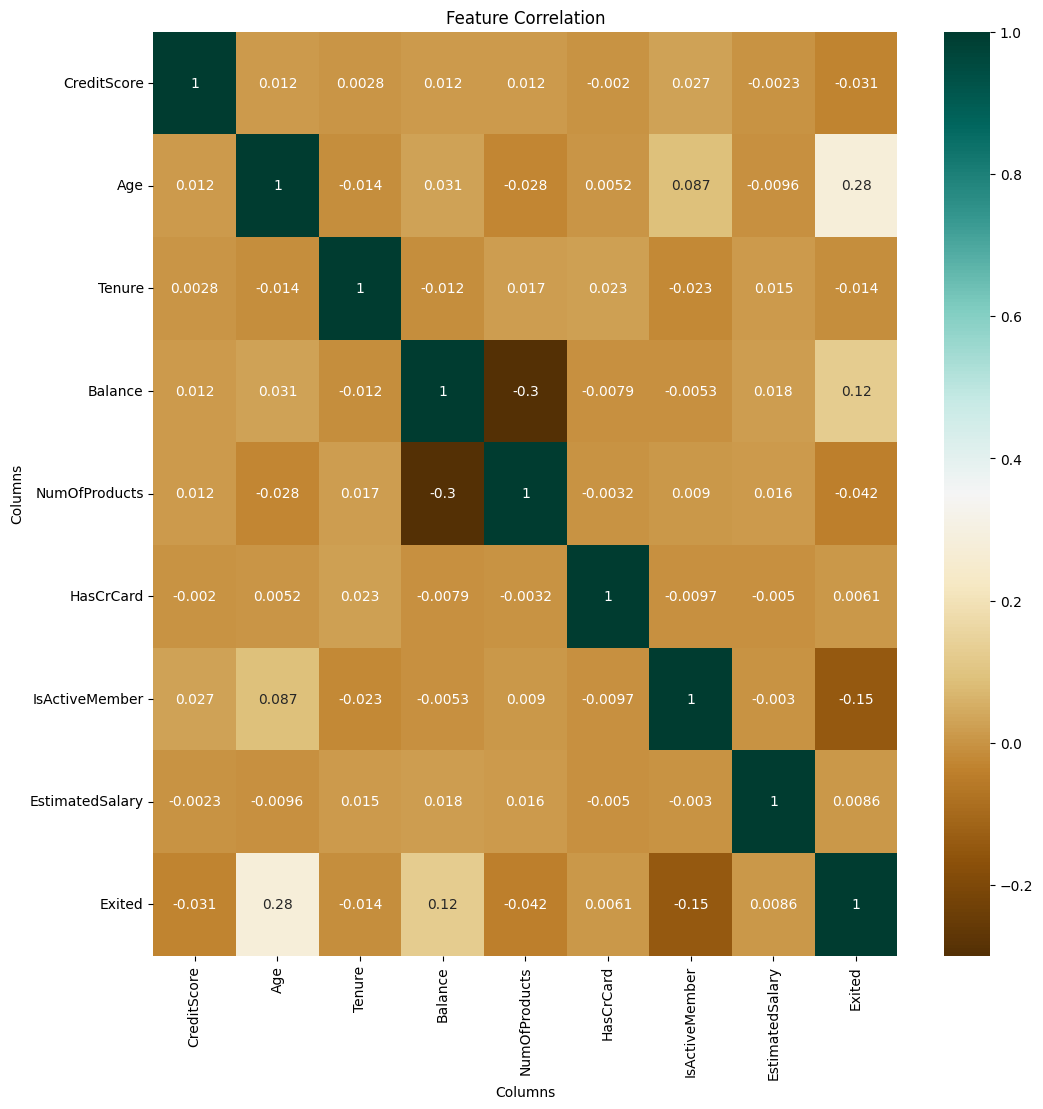

In [63]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

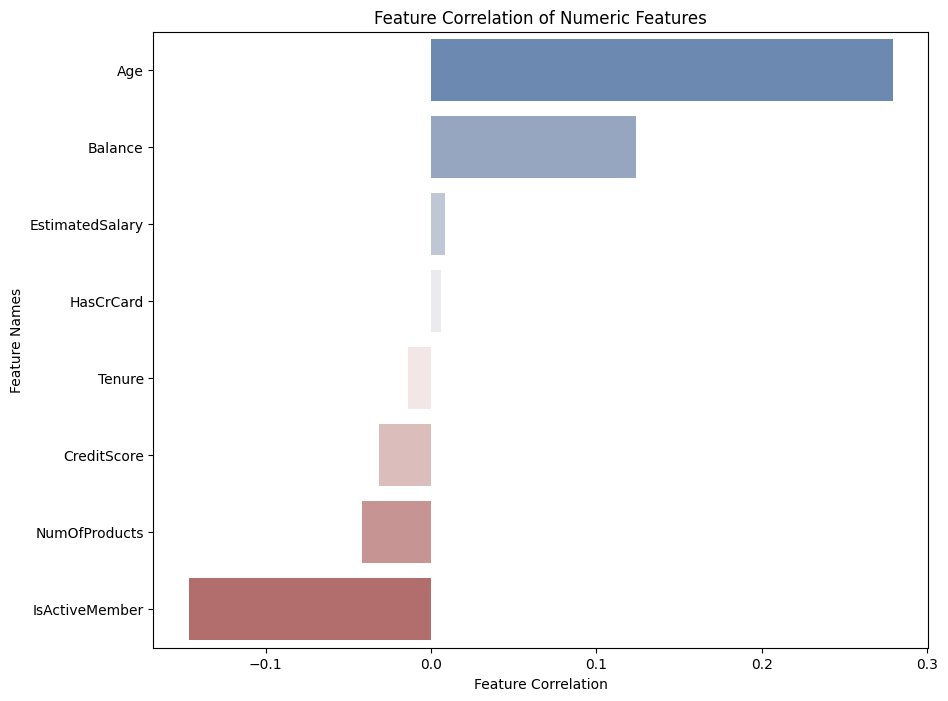

In [64]:
feat_corr = train_df.drop(columns='Exited').select_dtypes('number').apply(lambda x: x.corr(train_df.Exited))
feat_corr = pd.DataFrame(feat_corr, columns=['correlation']).sort_values(['correlation'], ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feat_corr['correlation'], y=feat_corr.index, palette="vlag").set(
title="Feature Correlation of Numeric Features", xlabel="Feature Correlation",
ylabel="Feature Names")
plt.show()

Preprocessing and transformations

In [65]:
binary_features = ['Gender', 'HasCrCard', 'IsActiveMember']
categorical_features = ['Geography']
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
target_column = ['Exited']

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_features),
    ("passthrough", target_column)
)

train_data = preprocessor.fit_transform(train_df)
categorical_feats = preprocessor.named_transformers_['onehotencoder-1'].get_feature_names_out(categorical_features).tolist()
binary_feats = preprocessor.named_transformers_['onehotencoder-2'].get_feature_names_out(binary_features).tolist()

feature_names = numeric_features + categorical_feats + binary_feats + target_column
transformed_train_df = pd.DataFrame(train_data, columns=feature_names)

# transform testing data
test_data = preprocessor.transform(test_df)
transformed_test_df = pd.DataFrame(test_data, columns=feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
transformed_train_df.to_csv('./train.csv', index=False)
transformed_test_df.to_csv('./test.csv', index=False)

In [67]:
X_train, y_train = transformed_train_df.drop(columns=["Exited"]), transformed_train_df["Exited"]
X_test, y_test = transformed_test_df.drop(columns=["Exited"]), transformed_test_df["Exited"]

Define score comparison method

In [68]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = {}

Building the model

In [69]:
import numpy as np

ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio

3.888268156424581

In [70]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=np.random.RandomState(123)),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=np.random.RandomState(123)),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=np.random.RandomState(123)),
}

for name, model in models.items():
    pipe = make_pipeline(model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

[LightGBM] [Info] Number of positive: 1146, number of negative: 4454
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204643 -> initscore=-1.357525
[LightGBM] [Info] Start training from score -1.357525
[LightGBM] [Info] Number of positive: 1146, number of negative: 4454
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 12
[LightGBM] [Info] [b

,fit_time,score_time,test_score,train_score
random forest,0.576 (+/- 0.011),0.028 (+/- 0.001),0.737 (+/- 0.031),1.000 (+/- 0.000)
xgboost,0.648 (+/- 0.521),0.006 (+/- 0.000),0.729 (+/- 0.018),0.958 (+/- 0.005)
lgbm,0.090 (+/- 0.009),0.010 (+/- 0.001),0.739 (+/- 0.011),0.884 (+/- 0.006)


In [71]:
#among the 3 tree based models LGBM seems to be the best performing so we are going to proceed with that

LGBM Hyperparameter Tunning

In [72]:
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    models["lgbm"],
)

In [73]:
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1146, number of negative: 4454
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204643 -> initscore=-1.357525
[LightGBM] [Info] Start training from score -1.357525
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

RandomizedSearchCV(estimator=Pipeline(steps=[('lgbmclassifier',
                                              LGBMClassifier(random_state=RandomState(MT19937) at 0x7EF8AA47B640,
                                                             scale_pos_weight=3.888268156424581))]),
                   n_iter=50, n_jobs=1,
                   param_distributions={'lgbmclassifier__learning_rate': [0.01,
                                                                          0.1],
                                        'lgbmclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef8a9ed1690>,
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef8a9ed0310>,
                                        'lgbmclassifier__subsample': [0.5, 0.75,
                                                                      1]},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, average=macro), verbose=1)

In [74]:
print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_ * 100))

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__max_depth': 16, 'lgbmclassifier__n_estimators': 97, 'lgbmclassifier__subsample': 0.75}
Best score: 75.490


Result On the Test Set

In [75]:
from sklearn.metrics import f1_score

best_model = random_search_lgbm.best_estimator_
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)

predictions = best_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)

Grid Search best model validation score: 0.755
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Macro-average f1 score on the test set: 0.776


In [76]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_test, predictions, target_names=["Stayed", "Exited"]
    )
)

              precision    recall  f1-score   support

      Stayed       0.90      0.93      0.91      2395
      Exited       0.68      0.60      0.64       605

    accuracy                           0.86      3000
   macro avg       0.79      0.76      0.78      3000
weighted avg       0.86      0.86      0.86      3000

